In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Goal: Predict the total gold medal count for the United States in this year’s games

In [87]:
df = pd.read_csv('olympic_medals.csv')
df['slug_game'] = df['slug_game'].str.extract('(\d+)').astype(int)
df = df[((df['slug_game'] - 1896) % 4 == 0) & (df['slug_game'] >= 1896)]
df = df[~df['slug_game'].isin([1904, 1980, 1984])]
df = df[(df['country_name'] == 'United States of America') & (df['medal_type'] == 'GOLD')]

In [98]:
df_grouped = df.groupby('slug_game').size().reset_index(name='count').assign(count=lambda x: x['count'] - 1).sort_values(by='slug_game', ascending=False)
df_grouped['Total'] = df_grouped['slug_game'].map({
    2020: 339,
    2016: 307,
    2012: 302,
    2008: 302,
    2004: 301,
    2000: 300,
    1996: 271,
    1992: 257,
    1988: 237,
    1984: 221,
    1980: 204,
    1976: 198,
    1972: 195,
    1968: 180,
    1964: 163,
    1960: 150,
    1956: 151,
    1952: 149,
    1948: 136,
    1936: 129,
    1932: 117,
    1928: 109,
    1924: 126,
    1920: 154,
    1912: 102,
    1908: 110,
    1906: 94,
    1900: 95,
    1896: 43
})
df_grouped['Percentage'] = df_grouped['count'] / df_grouped['Total']
df_grouped.head()

,slug_game,count,Total,Percentage
25,2020,39,339,0.115044
24,2016,46,307,0.149837
23,2012,49,302,0.162252
22,2008,38,302,0.125828
21,2004,37,301,0.122924


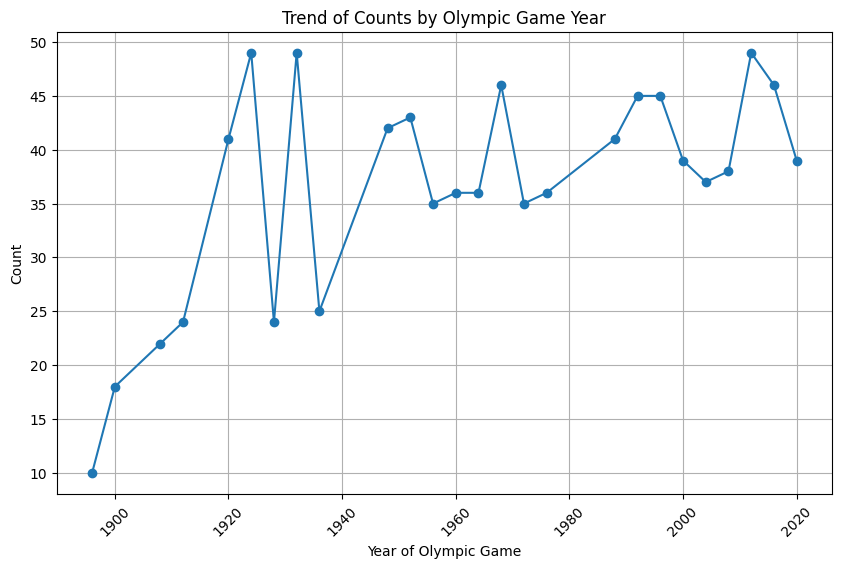

In [118]:
df_grouped = df_grouped.sort_values('slug_game')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['slug_game'], df_grouped['count'], marker='o')
plt.title('Trend of Counts by Olympic Game Year')
plt.xlabel('Year of Olympic Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

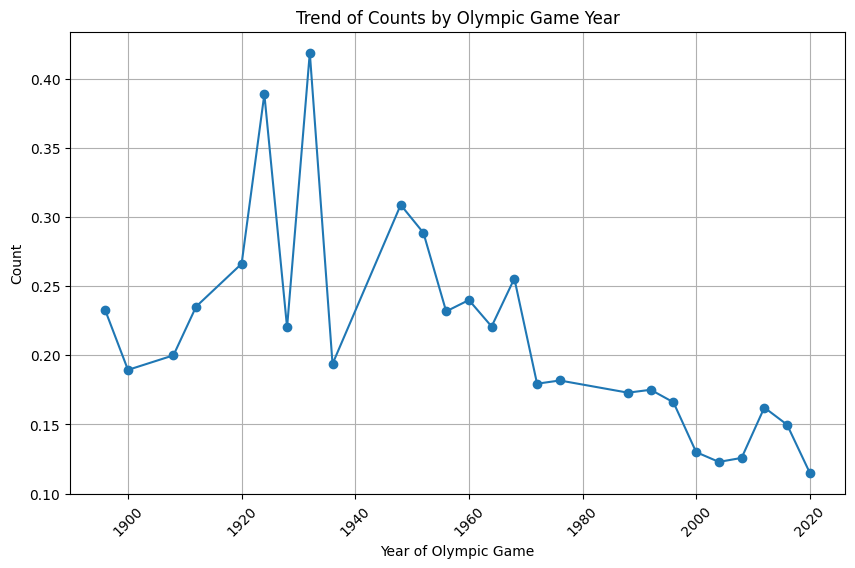

In [99]:
df_grouped = df_grouped.sort_values('slug_game')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['slug_game'], df_grouped['Percentage'], marker='o')
plt.title('Trend of Counts by Olympic Game Year')
plt.xlabel('Year of Olympic Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

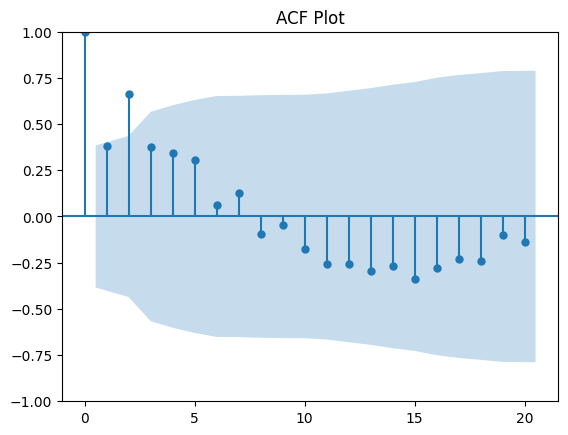

<Figure size 640x480 with 0 Axes>

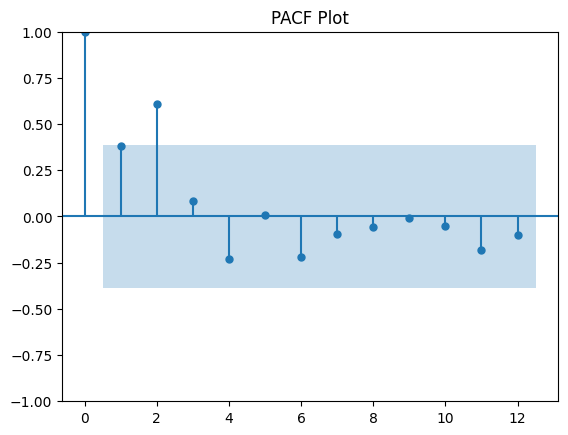

In [103]:
# Plot ACF
plt.figure()
plot_acf(df_grouped['Percentage'], lags=20)
plt.title('ACF Plot')
# Plot PACF
plt.figure()
plot_pacf(df_grouped['Percentage'], lags=12)
plt.title('PACF Plot')
plt.show()

In [114]:
# Fit the ARIMA model (example parameters; adjust based on ACF and PACF analysis)
model = ARIMA(df_grouped['Percentage'], order=(5,1,1))
model_fit = model.fit()
# Forecasting
forecast = model_fit.forecast(steps=1)
forecast = forecast.iloc[0]
# Find total medal count for 2024
total_medals = round(329 * forecast)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
print("I predict the total gold medal counts for the United State in this year's games to be", total_medals, ".")

I predict the total gold medal counts for the United State in this year's games to be 48 .


### Total Medal Count

In [136]:
df2 = pd.read_csv('olympic_medals.csv')
df2['slug_game'] = df2['slug_game'].str.extract('(\d+)').astype(int)
df2 = df2[((df2['slug_game'] - 1896) % 4 == 0) & (df2['slug_game'] >= 1896)]
df2 = df2[~df2['slug_game'].isin([1904, 1980, 1984])]
df2 = df2[(df2['country_name'] == 'United States of America')]

In [143]:
df_grouped2 = df2.groupby('slug_game').size().reset_index(name='count').assign(count=lambda x: x['count'] - 1).sort_values(by='slug_game', ascending=False)
df_grouped2['Total'] = df_grouped2['slug_game'].map({
    2020: 1080,
    2016: 973,
    2012: 962,
    2008: 953,
    2004: 1031,
    2000: 1067,
    1996: 1181,
    1992: 1036,
    1988: 1010,
    1984: 942,
    1980: 1038,
    1976: 1006,
    1972: 1172,
    1968: 1031,
    1964: 963,
    1960: 852,
    1956: 885,
    1952: 889,
    1948: 745,
    1936: 647,
    1932: 445,
    1928: 566,
    1924: 625,
    1920: 515,
    1912: 327,
    1908: 397,
    1906: 282,
    1900: 512,
    1896: 122
})
df_grouped2['Percentage'] = df_grouped2['count'] / df_grouped2['Total']
df_grouped2.head()

,slug_game,count,Total,Percentage
25,2020,117,1080,0.108333
24,2016,126,973,0.129496
23,2012,111,962,0.115385
22,2008,115,953,0.120672
21,2004,105,1031,0.101843


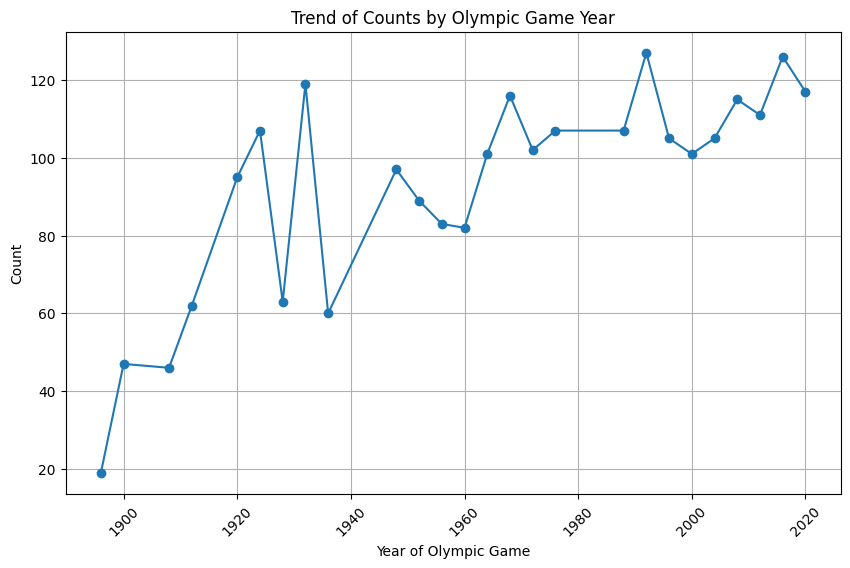

In [144]:
df_grouped2 = df_grouped2.sort_values('slug_game')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped2['slug_game'], df_grouped2['count'], marker='o')
plt.title('Trend of Counts by Olympic Game Year')
plt.xlabel('Year of Olympic Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

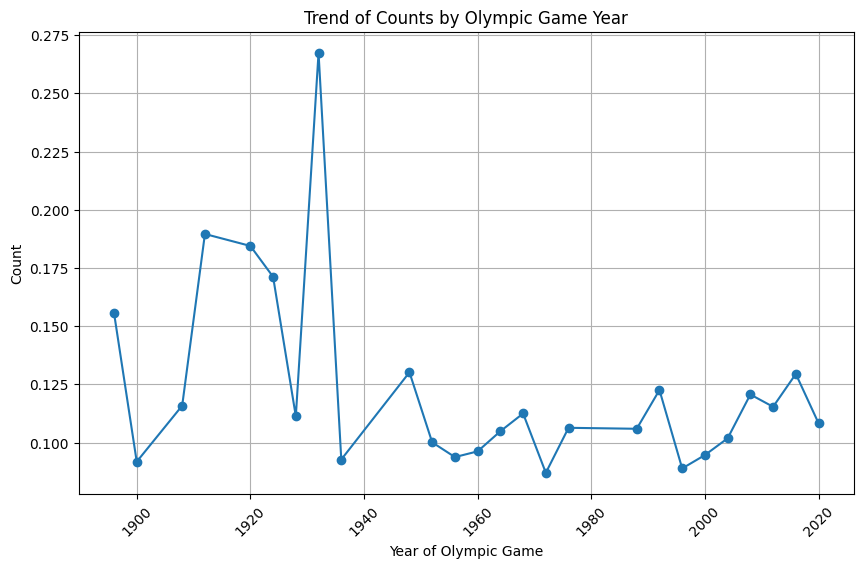

In [145]:
df_grouped2 = df_grouped2.sort_values('slug_game')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped2['slug_game'], df_grouped2['Percentage'], marker='o')
plt.title('Trend of Counts by Olympic Game Year')
plt.xlabel('Year of Olympic Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

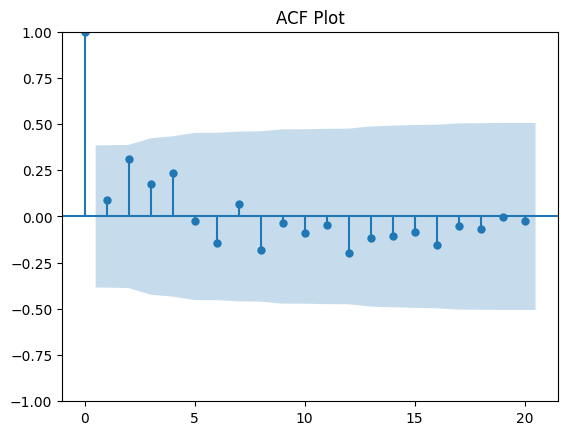

<Figure size 640x480 with 0 Axes>

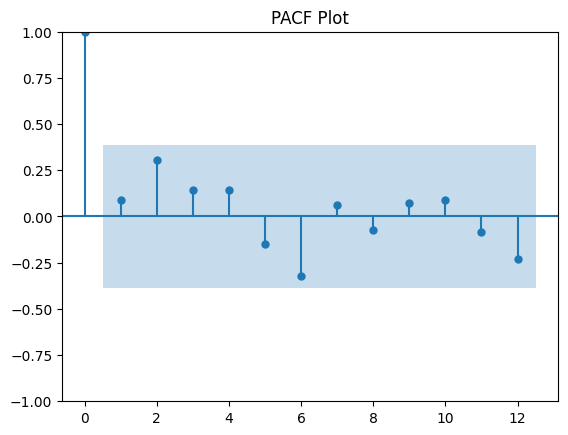

In [146]:
# Plot ACF
plt.figure()
plot_acf(df_grouped2['Percentage'], lags=20)
plt.title('ACF Plot')
# Plot PACF
plt.figure()
plot_pacf(df_grouped2['Percentage'], lags=12)
plt.title('PACF Plot')
plt.show()

In [148]:
# Fit the ARIMA model (example parameters; adjust based your ACF and PACF analysis)
model = ARIMA(df_grouped2['Percentage'], order=(4,1,2))
model_fit = model.fit()
# Forecasting
forecast = model_fit.forecast(steps=1)
forecast = forecast.iloc[0]
# Find total medal count for 2024
total_medals = round(987 * forecast)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [150]:
print("I predict the total medal counts for the United State in this year's games to be", total_medals, ".")

I predict the total medal counts for the United State in this year's games to be 132 .
